# Projeto Integrador
### Modelo de Pré Pagamento de contrato - quantidade de parcelas a serem antecipadas por perfil de clientes
Mapa de dados: https://docs.google.com/spreadsheets/d/1k7XPgPVn-c3Yn84GKI_CKoTlB_i10q7z7ygr71bNdk0/edit#gid=0

*Dados fornecidos pela Toyota*

### 1. Bibliotecas:

In [9]:
import pandas as pd
from pandas import read_csv
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error, mean_absolute_error
from scipy.stats import loguniform
from sklearn.linear_model import Ridge
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, plot_confusion_matrix, plot_roc_curve
import pickle

### 2. Bases:

## 3. Análise 

In [10]:
df_base = pd.read_csv('BASE_FINAL_5.csv',sep=',')
df_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134235 entries, 0 to 134234
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   MESREF_NUM          134235 non-null  int64  
 1   VLR_ENTRADA         134235 non-null  float64
 2   VLR_FINANCIADO      134235 non-null  float64
 3   DOWN_PAYMENT        134235 non-null  float64
 4   RANGE_DOWN_PAYMENT  134235 non-null  object 
 5   QTD_PRAZO           134235 non-null  int64  
 6   QTD_PRAZO_AGRP      134235 non-null  object 
 7   MODELO_AGRP         134235 non-null  object 
 8   ESTADO_VEICULO      134235 non-null  object 
 9   ANO_FABRIC          134235 non-null  int64  
 10  FL_TCM              134235 non-null  int64  
 11  NS_RANGE_REGIAO     134235 non-null  object 
 12  NS_PONTUACAO_CRIVO  134025 non-null  float64
 13  NS_RATING_CRIVO     134235 non-null  object 
 14  GRUPO_LOJAS         134235 non-null  object 
 15  VLR_VEIC            134235 non-nul

In [12]:
df_base.head()

,MESREF_NUM,VLR_ENTRADA,VLR_FINANCIADO,DOWN_PAYMENT,RANGE_DOWN_PAYMENT,QTD_PRAZO,QTD_PRAZO_AGRP,MODELO_AGRP,ESTADO_VEICULO,ANO_FABRIC,...,VLR_VEIC,SCORE_PONTOS,max_atraso,FX_MAX_ATRASO,MOB_FINAL_CONTRATO,STATUS_CONTRATO,CONTR_NEW,TIPO_PROD,DELTA_MOB,IDADE_VEIC
0,201804,28650.0,21980.19,0.57,51-60,24,13-24,Etios,N,2019,...,50630.19,995.0,0,0. 00 dpd,21,LIQUIDADO,5318042,CDC,-3,0
1,201804,50557.9,25186.80,0.67,61-80,36,25-36,Corolla,N,2019,...,75744.70,993.0,0,0. 00 dpd,27,LIQUIDADO,5318080,CDC,-9,0
2,201804,21000.0,54979.00,0.28,26-30,36,25-36,Etios,N,2019,...,75979.00,984.0,0,0. 00 dpd,35,LIQUIDADO,5319022,CICLO,-1,0
3,201804,30000.0,25579.99,0.54,51-60,24,13-24,Etios,N,2019,...,55579.99,995.0,2,1. 01-15 dpd,23,LIQUIDADO,5319628,CICLO,-1,0
4,201804,39938.5,46953.10,0.46,41-50,36,25-36,Corolla,N,2018,...,86891.60,976.0,0,0. 00 dpd,35,LIQUIDADO,5319914,CDC,-1,0


Tipos de dados de acordo com o esperado

### Verificando Valores Nulos

In [13]:
#Tratar base

df_base.isnull().sum()/len(df_base)

MESREF_NUM            0.000000
VLR_ENTRADA           0.000000
VLR_FINANCIADO        0.000000
DOWN_PAYMENT          0.000000
RANGE_DOWN_PAYMENT    0.000000
QTD_PRAZO             0.000000
QTD_PRAZO_AGRP        0.000000
MODELO_AGRP           0.000000
ESTADO_VEICULO        0.000000
ANO_FABRIC            0.000000
FL_TCM                0.000000
NS_RANGE_REGIAO       0.000000
NS_PONTUACAO_CRIVO    0.001564
NS_RATING_CRIVO       0.000000
GRUPO_LOJAS           0.000000
VLR_VEIC              0.000000
SCORE_PONTOS          0.001564
max_atraso            0.000000
FX_MAX_ATRASO         0.000000
MOB_FINAL_CONTRATO    0.000000
STATUS_CONTRATO       0.000000
CONTR_NEW             0.000000
TIPO_PROD             0.000000
DELTA_MOB             0.000000
IDADE_VEIC            0.000000
dtype: float64

In [14]:
#excluindo valores nulos
df_base.dropna(inplace=True)
print(df_base.shape)
print("="*20)
print(df_base.isna().sum())

(134025, 25)
MESREF_NUM            0
VLR_ENTRADA           0
VLR_FINANCIADO        0
DOWN_PAYMENT          0
RANGE_DOWN_PAYMENT    0
QTD_PRAZO             0
QTD_PRAZO_AGRP        0
MODELO_AGRP           0
ESTADO_VEICULO        0
ANO_FABRIC            0
FL_TCM                0
NS_RANGE_REGIAO       0
NS_PONTUACAO_CRIVO    0
NS_RATING_CRIVO       0
GRUPO_LOJAS           0
VLR_VEIC              0
SCORE_PONTOS          0
max_atraso            0
FX_MAX_ATRASO         0
MOB_FINAL_CONTRATO    0
STATUS_CONTRATO       0
CONTR_NEW             0
TIPO_PROD             0
DELTA_MOB             0
IDADE_VEIC            0
dtype: int64


In [15]:
df_base['DELTA_MOB'].describe().T

count    134025.000000
mean        -10.783145
std          12.714983
min         -60.000000
25%         -19.000000
50%          -5.000000
75%          -1.000000
max          35.000000
Name: DELTA_MOB, dtype: float64

In [16]:
# Checando a quantidade de linhas e colunas
print(f'O Conjunto de Dados possui: {df_base.shape[0]} linhas e {df_base.shape[1]} colunas')

O Conjunto de Dados possui: 134025 linhas e 25 colunas


In [17]:
#VERIFICANDO SE HÁ LINHAS DUPLICADAS
df_base.value_counts().shape
#nao há linhas duplicadas

(134025,)

### Correlação

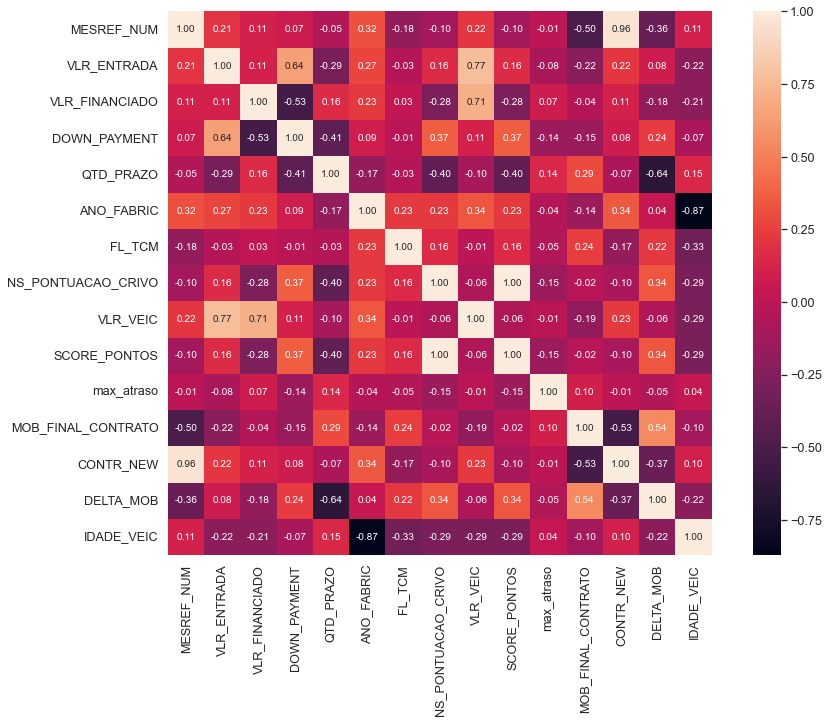

In [18]:
#correlação
corrmat = df_base.corr()
sns.set(font_scale=1.15)
f, ax = plt.subplots(figsize=(15, 10))
hm = sns.heatmap(corrmat, 
                 cbar=True, # formatando a barra lateral de cores para o heatmap
                 annot=True, 
                 square=True, 
                 fmt='.2f', 
                 annot_kws={'size': 10}, 
                 yticklabels=corrmat.columns, 
                 xticklabels=corrmat.columns)

### LIMPEZA E TRATAMENTO DOS DADOS

  Análises:
  

1.   As features DELTA_MOB e MOB_FINAL_CONTRATO estão computando -1, por isso se faz necessário adicionar +1 para que fique correto
2.   As feature max_atraso e FX_MAX_ATRASO serão excluídas, tendo em vista que trabalharemos com base no processo de contrato de financiamento, não ao longo do contrato
3.   A partir da feature MODELO_AGRP iremos categorizar os modelos, sendo: A | B | C (A: sw4, hilux, prius, camry, rav, lexus | B: corolla e corolla cross | C: etios e yaris 
Depois disso, excluir a MODELO_AGRP
4. Criaremos a target com base no % do financiamento pago, usando as features: (MOB_FINAL_CONTRATO / QTD_PRAZO) *100
5. Excluíremos MOB_FINAL_CONTRATO e DELTA_MOB, devido a nova target
6. Excluindo: MESREF_NUM e CONTR_NEW, pela indiferença na base 
7. Excluindo ANO_FABRIC - vamos utilizar a IDADE_VEIC
8. Excluindo VLR_ENTRADA, VLR_FINANCIADO  e RANGE_DOWN_PAYMENT  devido a correlação com a DOWN_PAYMENT (por ela ser %, corremos menos perigo de enviezar)
9. VLR_VEIC criaremos uma nova feature, com base na média de valor do modelo veículo (tendo em vista que houve uma crescente nos valores, mas os valores aumentaram de forma contínua *** testar hipótese | hipótese excluída
10.Excluindo: QTD_PRAZO_AGRP, porque estamos usando a QTD_PRAZO
11. Excluindo: STATUS_CONTRATO, é coluna FIXA "LIQUIDADO"
12. Excluindo SCORE_PONTOS e NS_PONTUACAO_CRIVO, usaremos NS_RATING_CRIVO (NS_PONTUACAO_CRIVO E SCORE_PONTOS tratam-se da mesma pontuação, e os valores são muito semelhantes entre eles, pode enviezar o resultado)

In [19]:
#o contrato morre em -1, então estou corrigindo a base acrescentando +1, para os contratos finalizados ficar com 0
df_base['DELTA_MOB'] = df_base['DELTA_MOB']+1

#o contrato morre em -1, então estou corrigindo a base acrescentando +1, para os contratos finalizados ficar com 0
df_base['MOB_FINAL_CONTRATO'] = df_base['MOB_FINAL_CONTRATO']+1
    

In [20]:
#verificando diferença entre score x crivo
df_base['DIF_SCORE_CRIVO'] =df_base['SCORE_PONTOS'] - df_base['NS_PONTUACAO_CRIVO']
print(df_base['DIF_SCORE_CRIVO'].unique())
#nao tem diferença, desconsiderar uma das duas colunas

[0.]


In [21]:
#analisar ns rating x pontuacao
df_base['NS_RATING_CRIVO'].unique()

array(['A', 'B', 'C', 'D', 'X', 'Outros'], dtype=object)

In [22]:
#excluindo score_pontos, por não notar diferença
df_base.drop(['DIF_SCORE_CRIVO','SCORE_PONTOS'],axis=1,inplace=True)

In [23]:
#EXCLUINDO ATRASO, TENDO EM VISTA QUE A REGRESSAO SERÁ APLICADA APENAS NOS NOVOS CONTRATOS
df_base.drop(['max_atraso'],axis=1,inplace=True)

In [24]:
#CRIANDO FEATURE %, % QUE PAGARAM DO CONTRATO
df_base['target'] = round((df_base['MOB_FINAL_CONTRATO']/df_base['QTD_PRAZO'])*100,2)

In [25]:
#excluindo delta_mob, em substituiação a FEATURE
df_base.drop(['DELTA_MOB'],axis=1,inplace=True)

In [26]:
#excluindo delta_mob, em substituiação a FEATURE
df_base.drop(['MOB_FINAL_CONTRATO'],axis=1,inplace=True)

In [27]:
df_base['MODELO_AGRP'].unique()

array(['Etios', 'Corolla', 'SW4', 'Hilux', 'OT - Prius', 'OT - Camry',
       'OT - RAV4', 'Outros', 'OT - Lexus', 'OT - Empilhadeira', 'Yaris',
       'OT - Prado', 'Corolla Cross'], dtype=object)

In [28]:
modelos = {'Etios':'C','Corolla':'B','SW4':'A','Hilux':'A','OT - Prius':'A','OT - Camry':'A','OT - RAV4':'A','Outros':'C','OT - Lexus':'A','OT - Empilhadeira':'C','Yaris':'C','OT - Prado':'A','Corolla Cross':'B'}

In [29]:
df_base['CAT_VEICULOS'] = df_base['MODELO_AGRP'].map(modelos)

In [30]:
df_base['CAT_VEICULOS'].unique()

array(['C', 'B', 'A'], dtype=object)

#### Hipótese valor veículo

In [31]:
# criando ano de fabricacao, com base na MESREF_NUM
df_base['ANO_COMPRA'] = df_base['MESREF_NUM'].astype(str).str.slice(0,4).astype(int)

In [32]:
df_base['ANO_COMPRA'].value_counts()

2019    55402
2018    50468
2020    19852
2021     8303
Name: ANO_COMPRA, dtype: int64

In [33]:
df_base['ANO_COMPRA'].loc[(df_base['MODELO_AGRP']) == "Corolla Cross"]

128026    2021
128085    2021
128090    2021
128093    2021
128094    2021
          ... 
134219    2021
134222    2021
134227    2021
134232    2021
134233    2021
Name: ANO_COMPRA, Length: 1425, dtype: int32

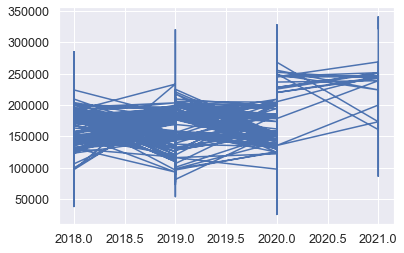

In [34]:
plt.plot(df_base['ANO_COMPRA'].loc[(df_base['MODELO_AGRP']) == "Hilux"], df_base['VLR_VEIC'].loc[(df_base['MODELO_AGRP']) == "Hilux"]) 


plt.show() 

In [35]:
df_base.drop(['ANO_COMPRA','MESREF_NUM','CONTR_NEW','ANO_FABRIC','VLR_ENTRADA','VLR_FINANCIADO','MODELO_AGRP','FX_MAX_ATRASO','RANGE_DOWN_PAYMENT','QTD_PRAZO_AGRP','STATUS_CONTRATO','NS_PONTUACAO_CRIVO'],axis=1,inplace=True)

In [36]:
df_base.head()

,DOWN_PAYMENT,QTD_PRAZO,ESTADO_VEICULO,FL_TCM,NS_RANGE_REGIAO,NS_RATING_CRIVO,GRUPO_LOJAS,VLR_VEIC,TIPO_PROD,IDADE_VEIC,target,CAT_VEICULOS
0,0.57,24,N,0,Centro-Oeste,A,Grupo,50630.19,CDC,0,91.67,C
1,0.67,36,N,0,Sudeste,A,Grupo,75744.70,CDC,0,77.78,B
2,0.28,36,N,1,Centro-Oeste,B,Grupo,75979.00,CICLO,0,100.00,C
3,0.54,24,N,1,Nordeste,A,Grupo,55579.99,CICLO,0,100.00,C
4,0.46,36,N,0,Nordeste,C,Grupo,86891.60,CDC,0,100.00,B


In [37]:
df_base.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134025 entries, 0 to 134234
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   DOWN_PAYMENT     134025 non-null  float64
 1   QTD_PRAZO        134025 non-null  int64  
 2   ESTADO_VEICULO   134025 non-null  object 
 3   FL_TCM           134025 non-null  int64  
 4   NS_RANGE_REGIAO  134025 non-null  object 
 5   NS_RATING_CRIVO  134025 non-null  object 
 6   GRUPO_LOJAS      134025 non-null  object 
 7   VLR_VEIC         134025 non-null  float64
 8   TIPO_PROD        134025 non-null  object 
 9   IDADE_VEIC       134025 non-null  int64  
 10  target           134025 non-null  float64
 11  CAT_VEICULOS     134025 non-null  object 
dtypes: float64(3), int64(3), object(6)
memory usage: 13.3+ MB


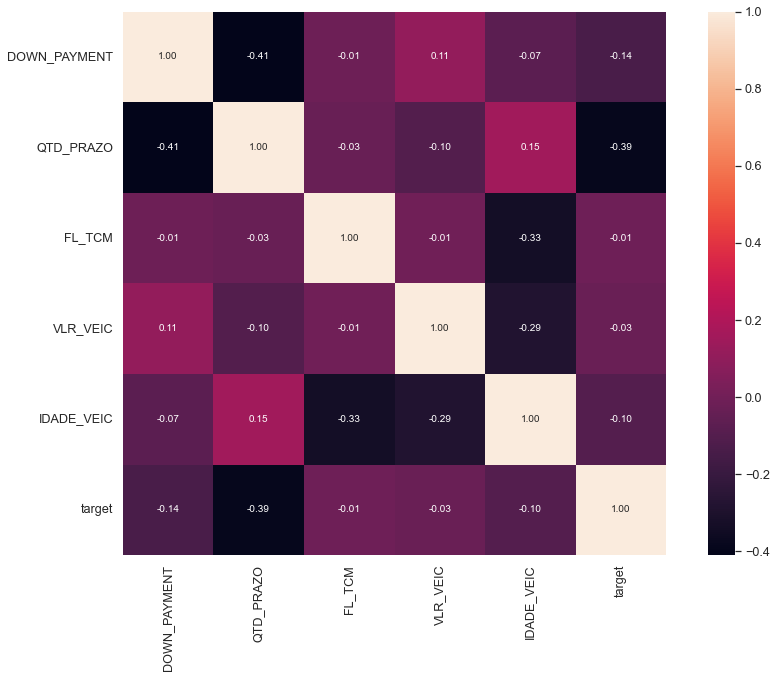

In [38]:
#correlação com base menor
corrmat = df_base.corr()
sns.set(font_scale=1.15)
f, ax = plt.subplots(figsize=(15, 10))
hm = sns.heatmap(corrmat, 
                 cbar=True, # formatando a barra lateral de cores para o heatmap
                 annot=True, 
                 square=True, 
                 fmt='.2f', 
                 annot_kws={'size': 10}, 
                 yticklabels=corrmat.columns, 
                 xticklabels=corrmat.columns)

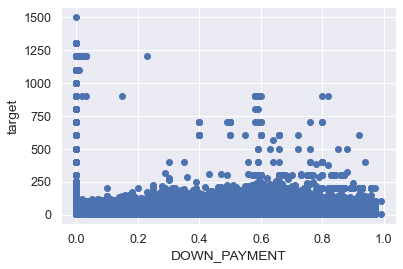

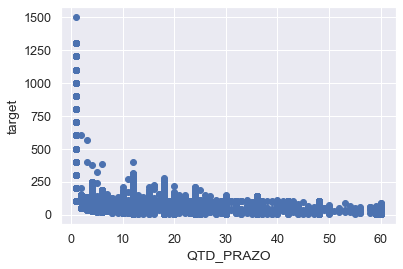

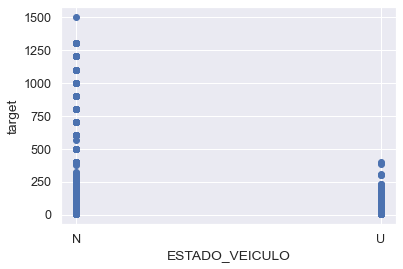

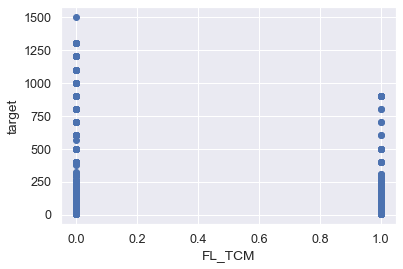

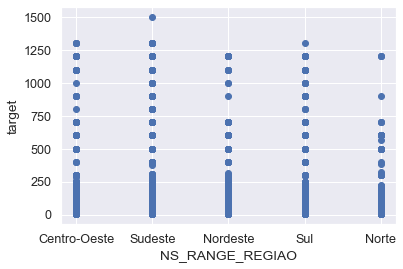

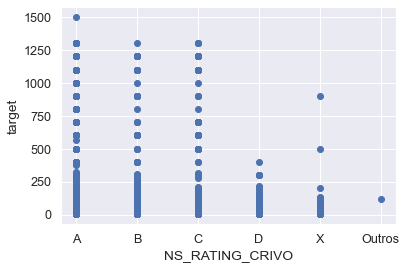

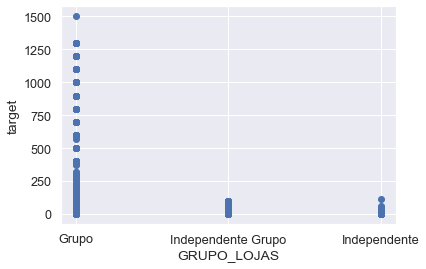

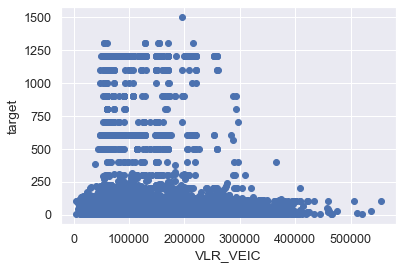

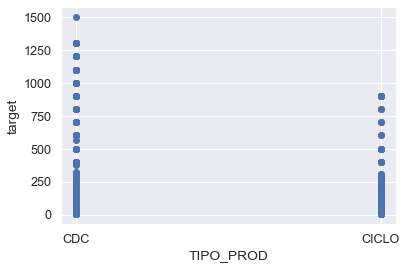

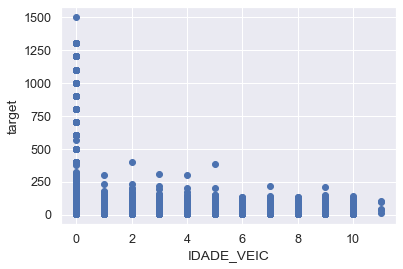

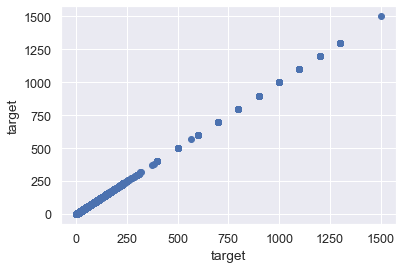

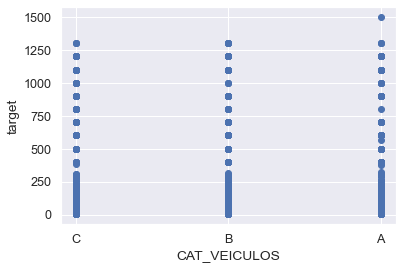

In [39]:
# plotando Prazo versus feature
number_cols = df_base.loc[:,df_base.columns]
for col in number_cols:
  plt.scatter(number_cols[col], number_cols['target'])
  plt.xlabel(col)
  plt.ylabel('target')
  plt.show()

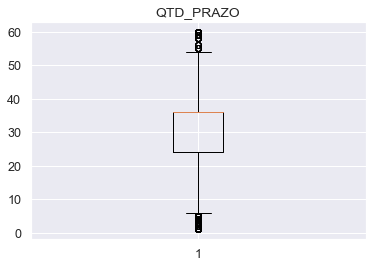

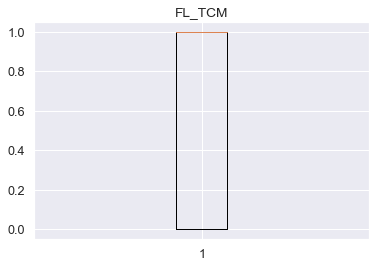

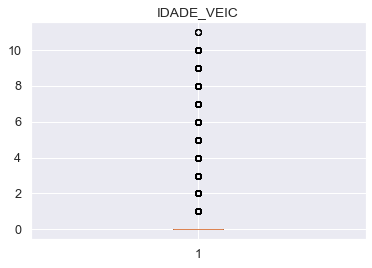

In [40]:
#verificando outliers
number_cols = df_base.select_dtypes(np.int64,np.float64).columns
for col in number_cols:
  plt.figure()
  plt.title(col)
  plt.boxplot(df_base[col])
  plt.show()

In [41]:
df_base_random = df_base
df_base_random = pd.get_dummies(df_base_random,drop_first=True)
df_base_random.head()

,DOWN_PAYMENT,QTD_PRAZO,FL_TCM,VLR_VEIC,IDADE_VEIC,target,ESTADO_VEICULO_U,NS_RANGE_REGIAO_Nordeste,NS_RANGE_REGIAO_Norte,NS_RANGE_REGIAO_Sudeste,...,NS_RATING_CRIVO_B,NS_RATING_CRIVO_C,NS_RATING_CRIVO_D,NS_RATING_CRIVO_Outros,NS_RATING_CRIVO_X,GRUPO_LOJAS_Independente,GRUPO_LOJAS_Independente Grupo,TIPO_PROD_CICLO,CAT_VEICULOS_B,CAT_VEICULOS_C
0,0.57,24,0,50630.19,0,91.67,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0.67,36,0,75744.70,0,77.78,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,0.28,36,1,75979.00,0,100.00,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
3,0.54,24,1,55579.99,0,100.00,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
4,0.46,36,0,86891.60,0,100.00,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0


### Separando Base Treino e Teste

In [42]:
X,y = df_base_random.drop('target', axis=1),df_base_random['target']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=123)

In [43]:
X_test

,DOWN_PAYMENT,QTD_PRAZO,FL_TCM,VLR_VEIC,IDADE_VEIC,ESTADO_VEICULO_U,NS_RANGE_REGIAO_Nordeste,NS_RANGE_REGIAO_Norte,NS_RANGE_REGIAO_Sudeste,NS_RANGE_REGIAO_Sul,NS_RATING_CRIVO_B,NS_RATING_CRIVO_C,NS_RATING_CRIVO_D,NS_RATING_CRIVO_Outros,NS_RATING_CRIVO_X,GRUPO_LOJAS_Independente,GRUPO_LOJAS_Independente Grupo,TIPO_PROD_CICLO,CAT_VEICULOS_B,CAT_VEICULOS_C
83067,0.58,24,1,77005.79,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1
27491,0.50,36,0,38055.62,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1
3330,0.59,36,1,51166.41,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1
101446,0.57,24,1,74987.32,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1
103057,0.00,1,0,84142.71,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100979,0.73,12,0,181726.26,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
70024,0.62,24,0,64939.62,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
28070,0.48,24,1,98156.95,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0
41539,0.41,24,1,80583.61,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1


In [44]:
# verificando o tamanho dos dados de treino e teste
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((93817, 20), (40208, 20), (93817,), (40208,))

## Análise de HiperParâmetros

In [45]:

#n_estimators = [10,30,60,100,500,1000]
#max_features = ['auto', 'sqrt']
#max_depth = [5,10,15,25,50]
#min_samples_split = [5,10,20]
##min_samples_leaf = [1,2,4]
#bootstrap = ['True','False']
#
#random_grid = {'n_estimators': n_estimators,
#               'max_features':max_features,
#               'max_depth': max_depth,
#               'min_samples_split': min_samples_split,
#               'bootstrap': bootstrap}
#
#rfr = RandomForestRegressor(random_state=42)
#rfr_tuned = RandomizedSearchCV(estimator = rfr,
#                               param_distributions=random_grid,
#                               n_iter=100, 
#                               cv=3,verbose=2,
#                               n_jobs=-1,
#                               random_state=42)
#mdl_diag1_rfr = rfr_tuned.fit(X_train, y_train)
#print(rfr_tuned.best_params_)
##'n_estimators': 500, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 15, 'bootstrap': 'True'

In [46]:
rfr_tuned = RandomForestRegressor(n_estimators = 1000, 
                                min_samples_split = 5, 
                                max_features = 'auto', 
                                max_depth = 15,
                                bootstrap = 'True',
                                random_state = 42)
mdl_diag1_rfr = rfr_tuned.fit(X_train, y_train)

In [47]:
y_pred_rfr = mdl_diag1_rfr.predict(X_test)
y_true_rfr = y_test.tolist()
y_pred_rfr_treino = mdl_diag1_rfr.predict(X_train)
y_true_rfr_treino = y_train.tolist()


In [48]:
#Metrics RFR Predicts teste
r2_rfr = r2_score(y_true_rfr,y_pred_rfr)
mape_rfr = mean_absolute_percentage_error(y_true_rfr,y_pred_rfr)
rmse_rfr = mean_squared_error(y_true_rfr,y_pred_rfr)**(1/2)
mae_rfr = mean_absolute_error(y_true_rfr,y_pred_rfr)

In [49]:
#Metrics RFR Predicts treino
r2_rfr_train = r2_score(y_true_rfr_treino,y_pred_rfr_treino)
mape_rfr_train = mean_absolute_percentage_error(y_true_rfr_treino,y_pred_rfr_treino)
rmse_rfr_train = mean_squared_error(y_true_rfr_treino,y_pred_rfr_treino)**(1/2)
mae_rfr_train = mean_absolute_error(y_true_rfr_treino,y_pred_rfr_treino)

In [50]:
print('R2 teste: ',r2_rfr, ' treino: ',r2_rfr_train)
print('-'*100)
print('MAPE teste: ',mape_rfr,' treino: ',mape_rfr_train,)
print('-'*100)
print('RMSE teste: ',rmse_rfr,' treino: ',rmse_rfr_train,)
print('-'*100)
print('MAE teste: ',mae_rfr,' treino: ',mae_rfr,)
print('-'*100)

R2 teste:  0.8325189541409588  treino:  0.9008874173384377
----------------------------------------------------------------------------------------------------
MAPE teste:  0.6759316065968815  treino:  0.5733299552878199
----------------------------------------------------------------------------------------------------
RMSE teste:  36.43278331785185  treino:  26.882453032777057
----------------------------------------------------------------------------------------------------
MAE teste:  21.819208273191048  treino:  21.819208273191048
----------------------------------------------------------------------------------------------------


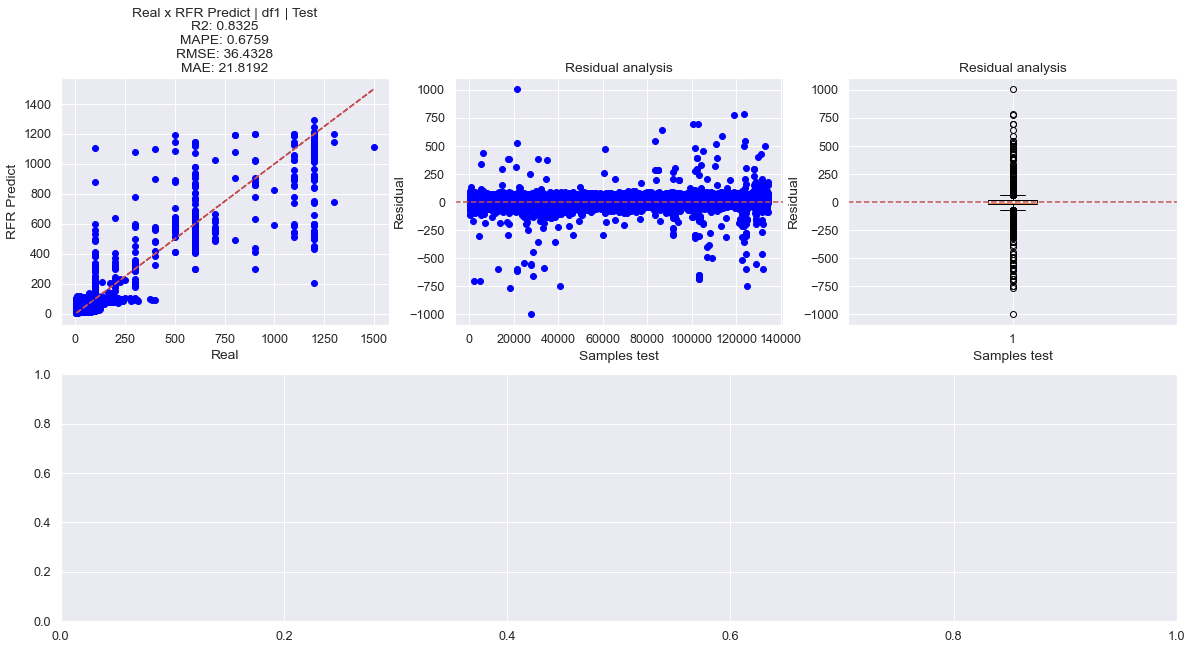

In [51]:
#Plots Modelo
plt.figure(figsize=(20, 10))
ax1 = plt.subplot(2,3,1)
ax2 = plt.subplot(2,3,2)
ax3 = plt.subplot(2,3,3)
ax4 = plt.subplot(2,3,(4,6))

axes = [ax1, ax2, ax3, ax4]

#Real x RFR Predict
ax1.scatter(x = y_true_rfr, y = y_pred_rfr, color = 'blue')
ax1.plot(y_true_rfr,y_true_rfr, color='r', ls='--')
ax1.set_xlabel('Real')
ax1.set_ylabel('RFR Predict')
#ax1.set_xlim(0,55)
#ax1.set_ylim(0,55)
ax1.set_title(f'Real x RFR Predict | df1 | Test\nR2: {r2_rfr:.4f}\nMAPE: {mape_rfr:.4f}\nRMSE: {rmse_rfr:.4f}\nMAE: {mae_rfr:.4f}');

#Residual Analysis | RFR Predict | Scatter
error = (y_pred_rfr - y_true_rfr)#.reshape(-1,1)
ax2.scatter(X_test.index, error, color = 'blue')
ax2.axhline(y = 0, color = 'r', linestyle = '--')
ax2.set_title("Residual analysis")
#ax2.set_ylim(-10,10)
ax2.set_ylabel('Residual')
ax2.set_xlabel('Samples test');

#Residual Analysis | RFR Predict | Boxplot
error = (y_pred_rfr - y_true_rfr)#.reshape(-1,1)
ax3.boxplot(error)
ax3.axhline(y = 0, color = 'r', linestyle = '--')
ax3.set_title("Residual analysis")
#ax3.set_ylim(-10,10)
ax3.set_ylabel('Residual')
ax3.set_xlabel('Samples test');

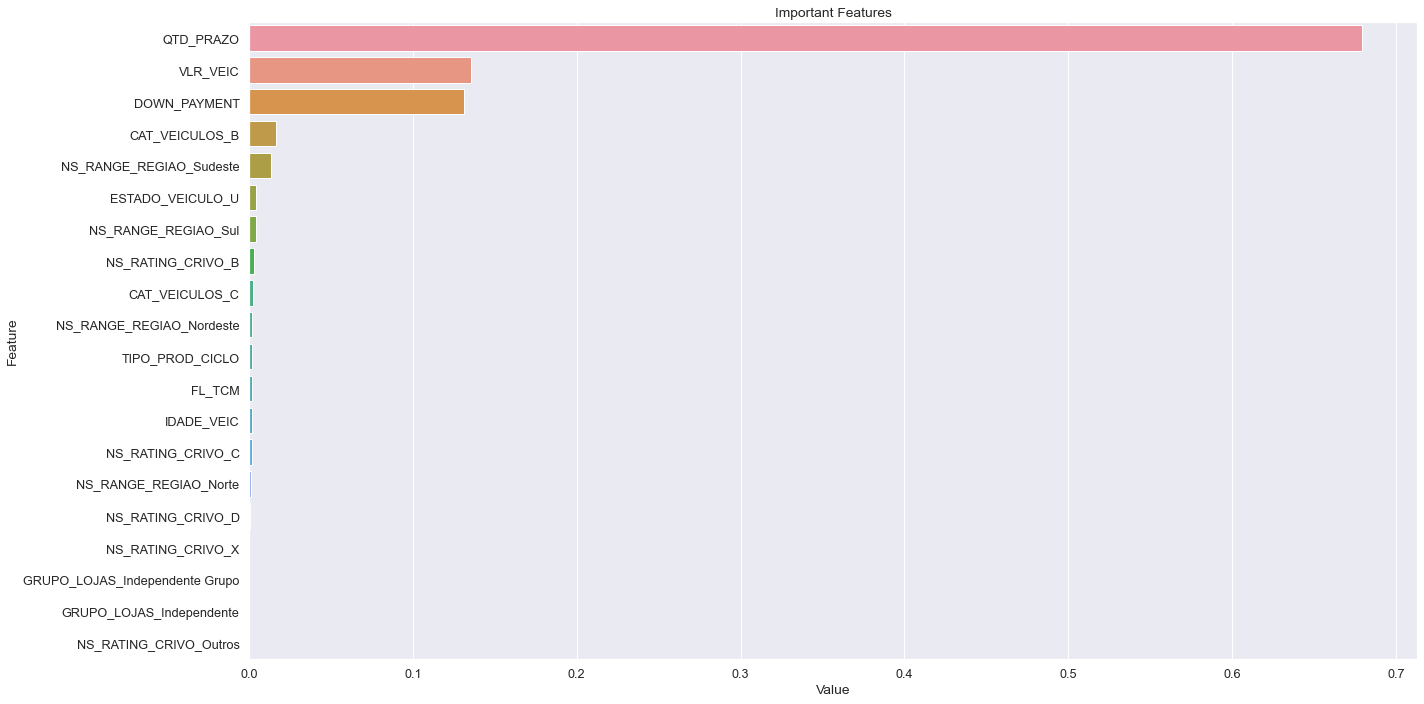

In [52]:
cols_model = X_train.columns

feature_imp = pd.DataFrame(sorted(zip(rfr_tuned.feature_importances_,cols_model)), columns=['Value','Feature'])
plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False).iloc[:50])
plt.title('Important Features')
plt.tight_layout()
plt.show()

In [53]:
rfr_tuned.feature_importances_

array([1.31239220e-01, 6.79238497e-01, 1.67981076e-03, 1.35663576e-01,
       1.63890264e-03, 4.52490933e-03, 1.70373935e-03, 8.94570730e-04,
       1.34712203e-02, 4.06246212e-03, 3.02425541e-03, 1.63470035e-03,
       5.80749653e-04, 0.00000000e+00, 2.14269658e-04, 4.45623558e-05,
       8.12980602e-05, 1.70133463e-03, 1.64642452e-02, 2.13767628e-03])

In [54]:
pickle.dump(rfr_tuned, open(r'pickle_rfr_tuned_select.pkl','wb'))